In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.shape

(5110, 12)

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#Only feature "bmi" consits of null records

### Univariate analysis

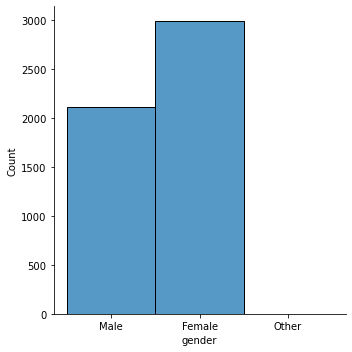

In [9]:
sns.displot(df["gender"], kde=False)

In [10]:
#The dataset consists of more female than male

<AxesSubplot:xlabel='age', ylabel='count'>

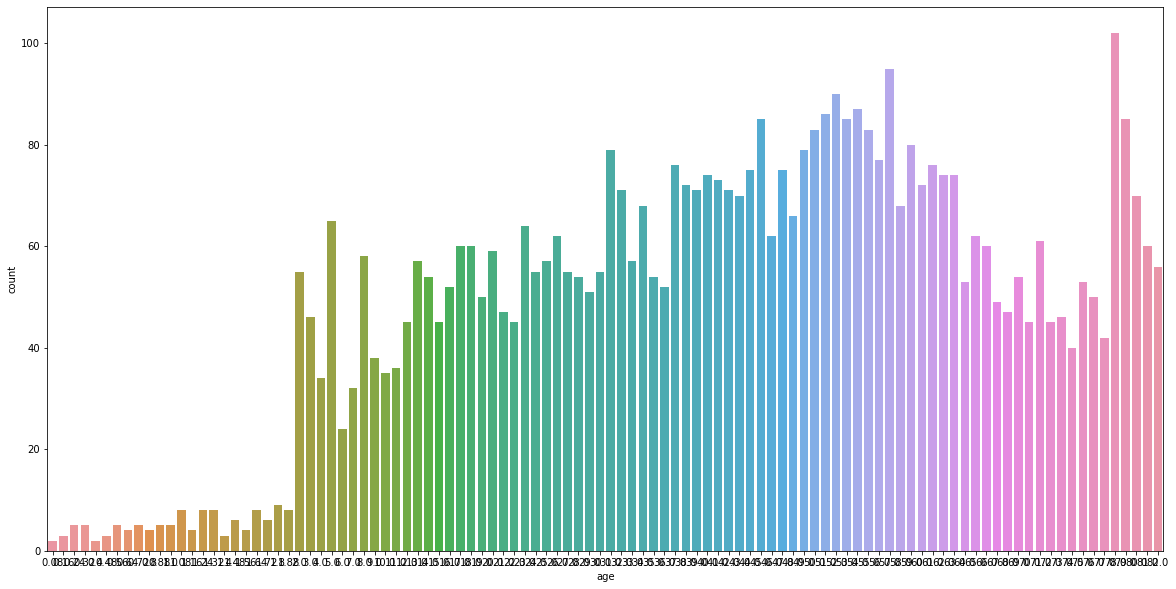

In [11]:
figure,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,10))
sns.countplot(x="age", data=df)

(array([434., 362., 440., 484., 597., 583., 686., 559., 407., 558.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

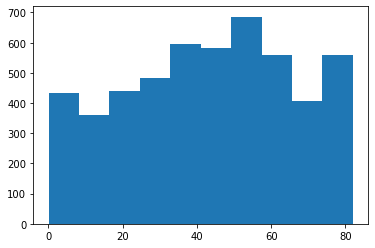

In [12]:
#For better understanding
plt.hist(df["age"])

In [13]:
df["age"].nunique()

104

In [14]:
df["age"].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

In [15]:
#Make groups for age
def age_groups(x):
    if x >= 0.0 and x < 10.0:
        return "age 0-9"
    elif x >= 10.0 and x < 20.0:
        return "age 10-19"
    elif x >= 20.0 and x < 40.0:
        return "age 20-39"
    elif x >= 40.0 and x < 60.0:
        return "age 40-59"
    else:
        return "age 60-80"

In [16]:
df["age_group"] = df["age"].apply(lambda x:age_groups(x))

<AxesSubplot:xlabel='age_group', ylabel='count'>

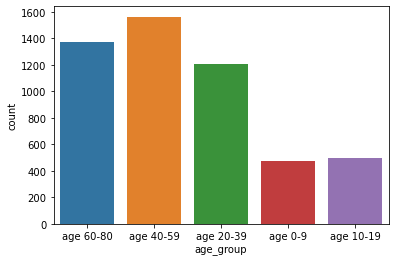

In [17]:
sns.countplot(x="age_group", data=df)

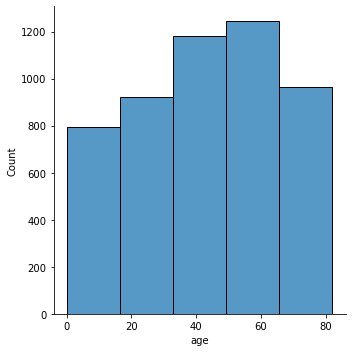

In [18]:
#Alternate way and better way
sns.displot(df["age"], kde=False,bins=5)

In [19]:
#The most data is of age group 50-70 years

<AxesSubplot:xlabel='hypertension', ylabel='count'>

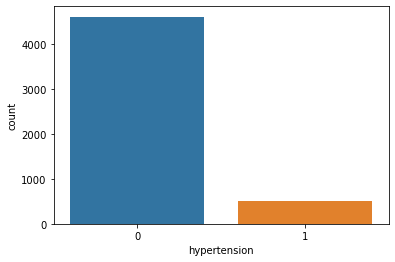

In [20]:
#Let's look at hypertension
sns.countplot(x="hypertension", data=df)

In [21]:
df["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [22]:
#As you can see more number of people have no hypertension

<AxesSubplot:>

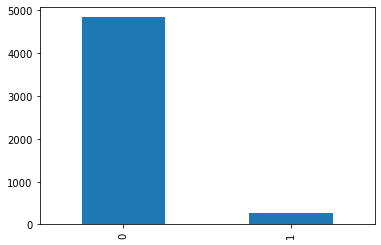

In [23]:
#Let's look at who has heart disease 
df["heart_disease"].value_counts().plot.bar()

In [24]:
#Most people don't have heart disease

<AxesSubplot:xlabel='ever_married', ylabel='count'>

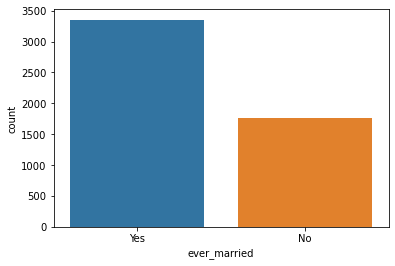

In [25]:
sns.countplot(x="ever_married", data=df)

In [26]:
#Most of the people in the dataset are under "ever married" group

In [27]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

([<matplotlib.patches.Wedge at 0x7fcc30cd7070>,
 [Text(-1.0716631969767034, -0.24806852328675585, 'Private'),
  Text(0.9001397216431128, -0.6322566579485418, 'Self-employed'),
  Text(1.0463709109499704, 0.33927557636489136, 'children'),
  Text(0.45952734783433336, 0.9994171384323685, 'Govt_job'),
  Text(0.014877364452567906, 1.0998993881382721, 'Never_worked')],
 [Text(-0.5845435619872926, -0.13531010361095772, '57.241'),
  Text(0.49098530271442514, -0.34486726797193185, '16.027'),
  Text(0.5707477696090747, 0.18505940528994072, '13.444'),
  Text(0.25065128063690906, 0.54513662096311, '12.857'),
  Text(0.008114926065037038, 0.5999451208026939, '0.431')])

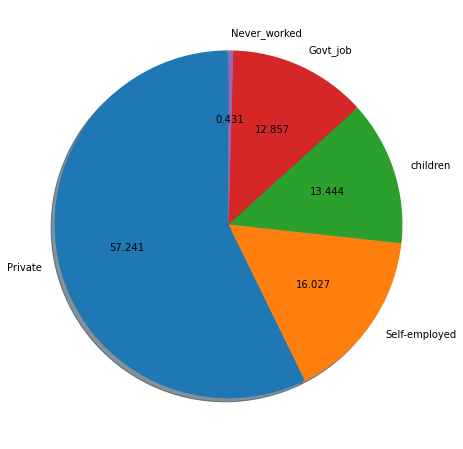

In [28]:
plt.figure(figsize=(8,8))
plt.pie(df["work_type"].value_counts(),startangle=90, autopct='%.3f', 
       labels=['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'], shadow=True)

In [29]:
#Mostly people work on private businesses

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

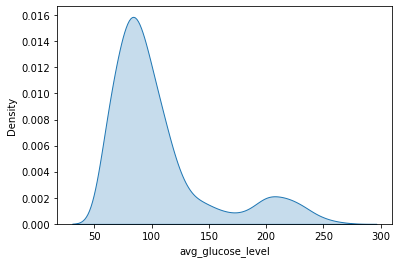

In [30]:
#let's plot a density plot for feature "avg_glucose_level"
sns.kdeplot(df["avg_glucose_level"], shade=True)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

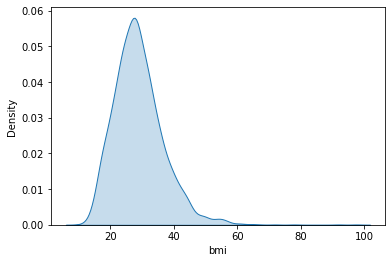

In [31]:
sns.kdeplot(df["bmi"], shade=True)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

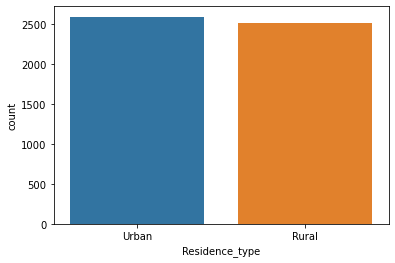

In [32]:
#let's look at residence type
sns.countplot(x="Residence_type", data=df)

In [33]:
#The data contains equal number of data for both urban and rural residence type feature

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

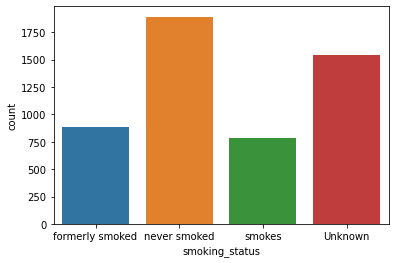

In [34]:
sns.countplot(x="smoking_status", data=df)

In [35]:
#Most people in the dataset have never smoked

### Bivariate Analysis

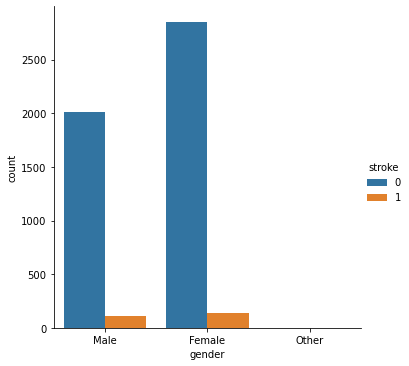

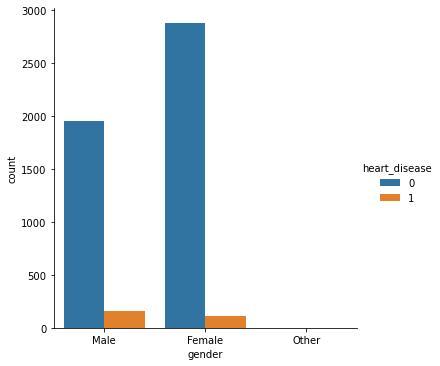

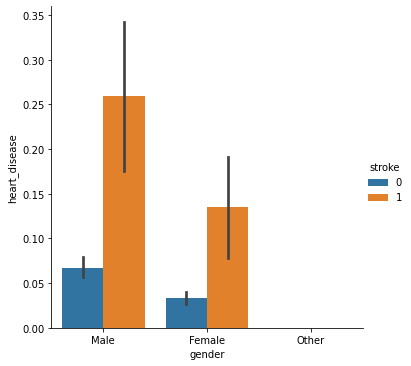

In [70]:
# gender
sns.catplot(x="gender", hue="stroke", kind="count", data=df)
sns.catplot(x="gender", hue="heart_disease", kind="count", data=df)
sns.catplot(x="gender", y="heart_disease", hue="stroke", kind="bar", data=df)

In [59]:
#The gender feature doesn't tell us much, as it has a similar distribution with all the features
#From the last graph, more male are preferred to have a heart disease and inturn a stroke than female

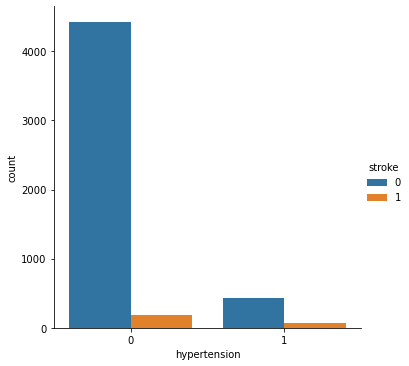

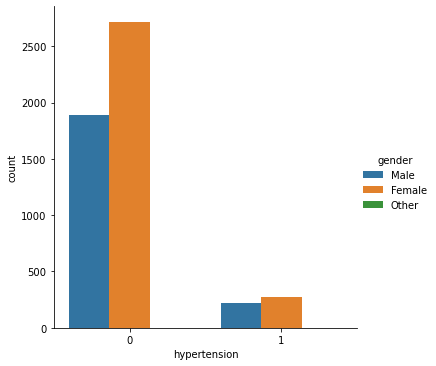

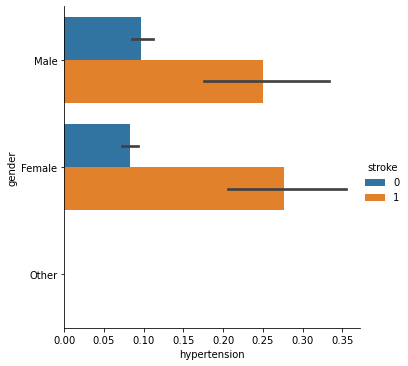

In [72]:
#hypertension
sns.catplot(x="hypertension", hue="stroke", kind="count", data=df)
sns.catplot(x="hypertension", hue="gender", kind="count", data=df)
sns.catplot(x="hypertension", y="gender", hue="stroke", kind="bar", data=df)

In [73]:
#having hypertension will result in a stroke for a patient

In [ ]:
# avg_glucose_level      0
# bmi                  201
# stroke                 0
# dtype: int64

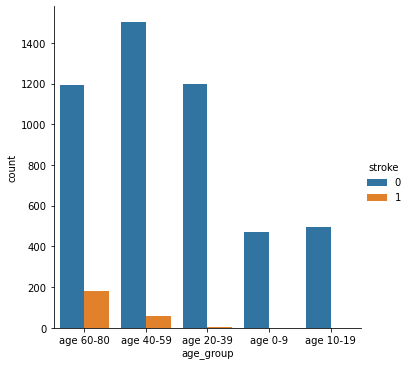

In [78]:
sns.catplot(x="age_group", hue="stroke", kind="count", data=df)

In [79]:
#Most people who have a stroke are between ages: 40-80 

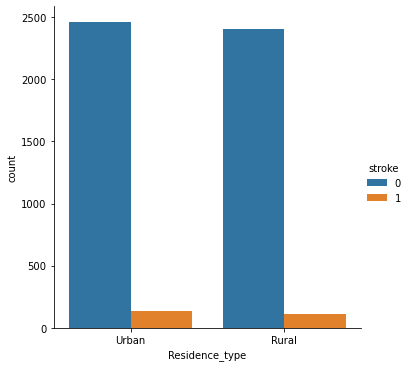

In [86]:
sns.catplot(x="Residence_type", hue="stroke", kind="count", data=df)

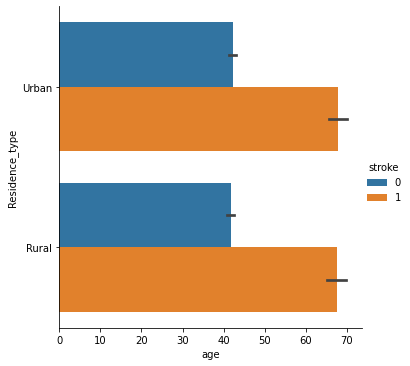

In [81]:
# age
sns.catplot(x="age", y="Residence_type", hue="stroke", kind="bar", data=df)

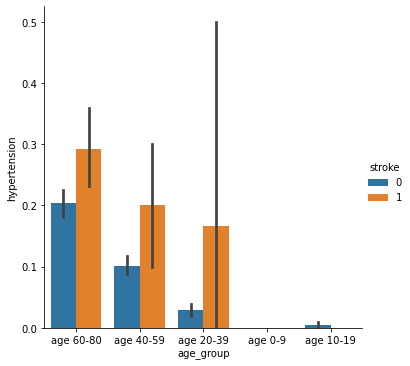

In [69]:
sns.catplot(x="age_group", y="hypertension", hue="stroke", kind="bar", data=df)

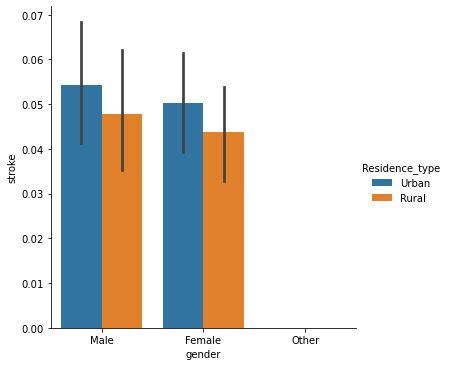

In [92]:
sns.catplot(x="gender", y="stroke", hue="Residence_type", kind="bar", data=df)

In [93]:
#More urban people get stroke

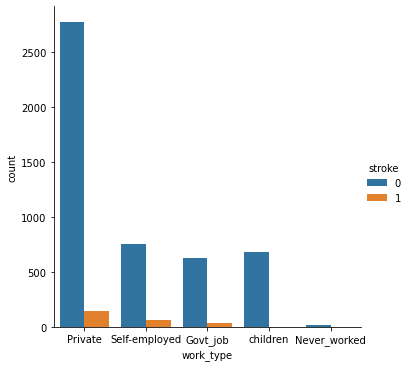

In [94]:
sns.catplot(x="work_type", hue="stroke", kind="count", data=df)

In [95]:
#More private & self-employed people get stroke

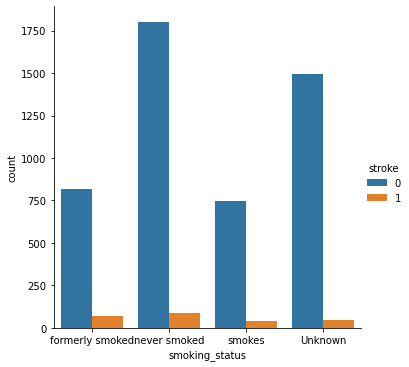

In [96]:
sns.catplot(x="smoking_status", hue="stroke", kind="count", data=df)

In [97]:
#smoking_status doen't have any effect on stroke feature

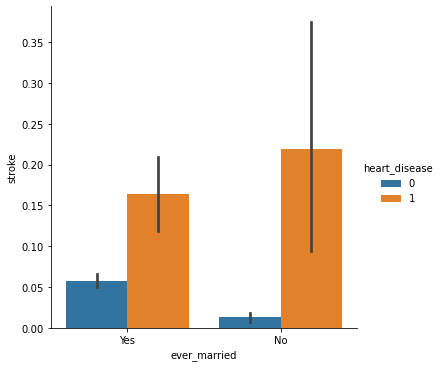

In [98]:
sns.catplot(x="ever_married", y="stroke", hue="heart_disease", kind="bar", data=df)

In [99]:
#people who were never married and have heart diseases are more likely to get a stroke

<AxesSubplot:>

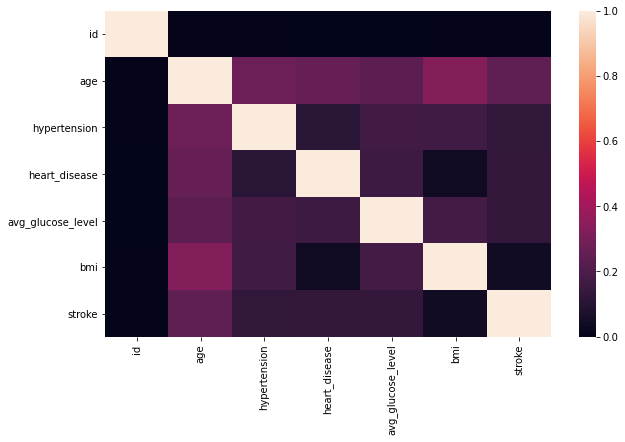

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='work_type', ylabel='bmi'>

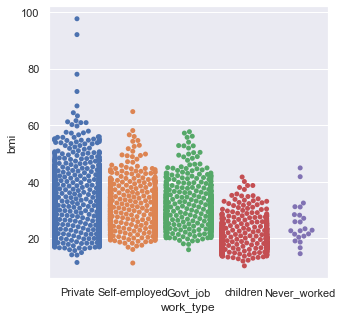

In [105]:
#swarm plot
sns.set(rc={'figure.figsize':(5,5)})
sns.swarmplot(x=df["work_type"], y=df["bmi"])

<AxesSubplot:xlabel='Residence_type', ylabel='avg_glucose_level'>

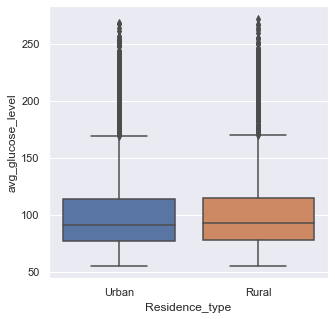

In [110]:
sns.boxplot(x="Residence_type", y="avg_glucose_level", data=df)

<AxesSubplot:xlabel='heart_disease', ylabel='bmi'>

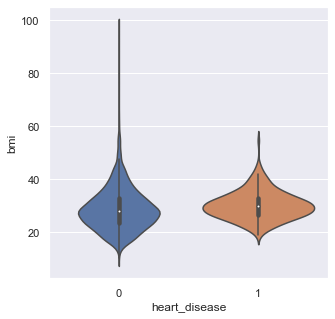

In [112]:
sns.violinplot(x=df["heart_disease"], y=df["bmi"], data=df)